# Model 1 includes random effects and interaction effects

In [40]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
% matplotlib inline

model1 = pm.Model()

r  = np.array([10, 23, 23, 26, 17, 5, 53, 55, 32, 46, 10, 8, 10, 8, 23, 0,  3, 22, 15, 32, 3])
n  = np.array([39, 62, 81, 51, 39, 6, 74, 72, 51, 79, 13, 16, 30, 28, 45, 4, 12, 41, 30, 51, 7])
x1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
x2 = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

inits = {
    "tau": 1.0,
    "alpha0": 0.0,
    "alpha2": 0.0,
    "alpha12": 0.0
}

with model1:
    
    alpha0 = pm.Normal("interc", 0.0, 1000) # intercept
    alpha1 = pm.Normal("seed coeff", 0.0, 1000)  # seed coeff
    alpha2 = pm.Normal("extract coeff", 0.0, 1000) # extract coeff
    alpha12 = pm.Normal("interact coeff", 0.0, 1000) # interaction coeff
    tau = pm.Gamma("tau", 1.0E-3,1.0E-3)
    sigma = pm.Deterministic("sigma", 1.0 / pm.math.sqrt(tau))
    
    b = []
    p = []
    r_ = []
    
    for i in range(r.size):
        b.append(pm.Normal('b{0}'.format(i), 0, sigma))
        p.append(pm.Deterministic("p{0}".format(i), 
                                pm.math.invlogit(alpha0 + alpha1*x1[i] + alpha2*x2[i] + alpha12*x1[i]*x2[i] + b[i])))
        r_.append(pm.Binomial("r{0}".format(i), n[i], p[i], observed=r[i]))
        
    trace1 = pm.sample(10000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -97.804: 100%|██████████| 200000/200000 [00:41<00:00, 4767.99it/s]
Finished [100%]: Average ELBO = -97.886
100%|██████████| 10000/10000 [02:50<00:00, 58.80it/s]


# Model 2 does not include interaction effects

In [41]:
model2 = pm.Model()

with model2:
    
    alpha0 = pm.Normal("interc", 0.0, 1000) # intercept
    alpha1 = pm.Normal("seed coeff", 0.0, 1000)  # seed coeff
    alpha2 = pm.Normal("extract coeff", 0.0, 1000) # extract coeff
    tau = pm.Gamma("tau", 1.0E-3,1.0E-3)
    sigma = pm.Deterministic("sigma", 1.0 / pm.math.sqrt(tau))
    
    b = []
    p = []
    r_ = []
    
    for i in range(r.size):
        b.append(pm.Normal('b{0}'.format(i), 0, tau))
        p.append(pm.Deterministic("p{0}".format(i), 
                                pm.math.invlogit(alpha0 + alpha1*x1[i] + alpha2*x2[i] + b[i])))
        r_.append(pm.Binomial("r{0}".format(i), n[i], p[i], observed=r[i]))
        
    trace2 = pm.sample(10000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -91.838: 100%|██████████| 200000/200000 [00:45<00:00, 4378.09it/s]
Finished [100%]: Average ELBO = -91.781
100%|██████████| 10000/10000 [02:31<00:00, 119.98it/s]


# Model 3 does not include root extract effects or interaction effects

In [42]:
model3 = pm.Model()

with model3:
    
    alpha0 = pm.Normal("interc", 0.0, 1000) # intercept
    alpha1 = pm.Normal("seed coeff", 0.0, 1000)  # seed coeff
    tau = pm.Gamma("tau", 1.0E-3,1.0E-3)
    sigma = pm.Deterministic("sigma", 1.0 / pm.math.sqrt(tau))
    
    b = []
    p = []
    r_ = []
    
    for i in range(r.size):
        b.append(pm.Normal('b{0}'.format(i), 0, tau))
        p.append(pm.Deterministic("p{0}".format(i), 
                                pm.math.invlogit(alpha0 + alpha1*x1[i] + b[i])))
        r_.append(pm.Binomial("r{0}".format(i), n[i], p[i], observed=r[i]))
        
    trace3 = pm.sample(10000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -90.041: 100%|██████████| 200000/200000 [00:40<00:00, 4904.62it/s]
Finished [100%]: Average ELBO = -90.063
100%|██████████| 10000/10000 [02:13<00:00, 74.81it/s]


# Model 4 does not include random effects

In [43]:
model4 = pm.Model()
with model4:
    
    alpha0 = pm.Normal("interc", 0.0, 1000) # intercept
    alpha1 = pm.Normal("seed coeff", 0.0, 1000)  # seed coeff
    alpha2 = pm.Normal("extract coeff", 0.0, 1000) # extract coeff
    alpha12 = pm.Normal("interact coeff", 0.0, 1000) # interaction coeff
    
    p = []
    r_ = []
    
    for i in range(r.size):
        p.append(pm.Deterministic("p{0}".format(i), 
                                pm.math.invlogit(alpha0 + alpha1*x1[i] + alpha2*x2[i] + alpha12*x1[i]*x2[i])))
        r_.append(pm.Binomial("r{0}".format(i), n[i], p[i], observed=r[i]))
        
    trace4 = pm.sample(10000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -91.381: 100%|██████████| 200000/200000 [00:15<00:00, 12664.33it/s]
Finished [100%]: Average ELBO = -91.386
100%|██████████| 10000/10000 [01:03<00:00, 158.45it/s]


In [ ]:
models = [model1, model2, model3, model4]
traces = [trace1, trace2, trace3, trace4]


mean_deviances = [-2 * np.mean([models[i].logp(pt) for pt in traces[i]]) for i in range(len(models))]

free_rv_means = [{rv.name: traces[i][rv.name].mean(
    axis=0) for rv in models[i].free_RVs} for i in range(len(models))]

deviances_at_mean = [-2 * models[i].logp(free_rv_means[i]) for i in range(len(models))]

eff_n_params = np.array(mean_deviances) - np.array(deviances_at_mean)
dics = np.array(mean_deviances) + eff_n_params

# Model Selection

In [60]:

print("Model    |  DIC   | Mean Dev | Effective # of params | Number of params")
print("--------------------------------------------")
print("Model 1  | {0:.2f} | {1:.2f}   | {2:.2f}                 | {3}".format(
    dics[0], mean_deviances[0], eff_n_params[0], 26))
print("Model 2  | {0:.2f} | {1:.2f}   | {2:.2f}                 | {3}".format(
    dics[1], mean_deviances[1], eff_n_params[1], 25))
print("Model 3  | {0:.2f} | {1:.2f}   | {2:.2f}                 | {3}".format(
    dics[2], mean_deviances[2], eff_n_params[2], 24))
print("Model 4  | {0:.2f} | {1:.2f}   | {2:.2f}                  | {3}".format(
    dics[3], mean_deviances[3], eff_n_params[3], 4))

Model    |  DIC   | Mean Dev | Effective # of params | Number of params
--------------------------------------------
Model 1  | 208.97 | 183.08   | 25.89                 | 26
Model 2  | 194.54 | 172.38   | 22.15                 | 25
Model 3  | 210.60 | 186.75   | 23.85                 | 24
Model 4  | 180.37 | 176.43   | 3.94                  | 4


I thought these results were interesting.  The effective number of parameter estimates were very close to the actual number of parameters in the model, except for model 2, where it was off by almost three (It actually slightly overestimated this number the first time I ran MCMC). 

Model 4 has the lowest DIC, has much fewer parameters because we aren't modeling random effects, and produces posterior credible intervals for germination probability that significantly overlap with the intervals of other models.  I'm choosing model 4, and I like it because it's invariant with respect to the plate, which doesn't seem to matter much anyway.  For example, all of the posterior credible intervals for all of the random effects included zero in the other models.

# Output Summary

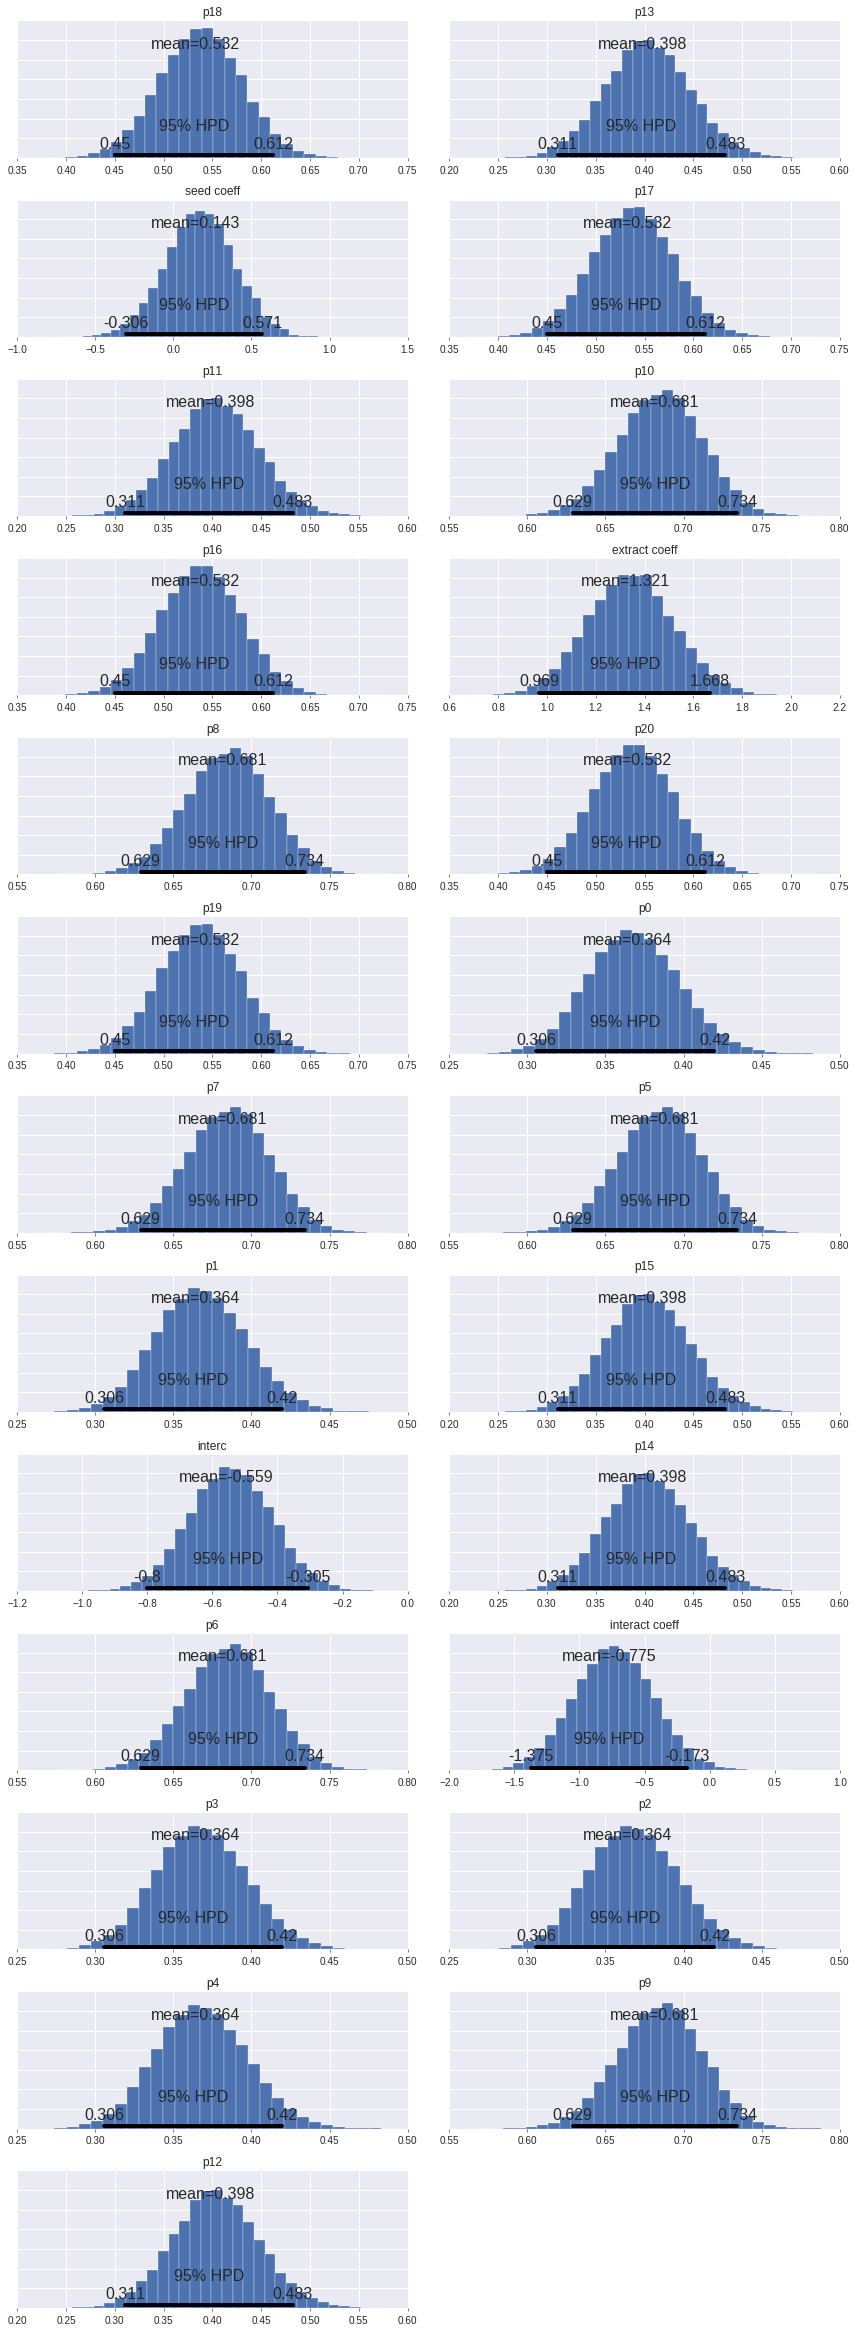

In [71]:
ps = ["p{0}".format(i) for i in range(r.size)]
coeffs = ["interc", "seed coeff", "extract coeff", "interact coeff"]

pm.plots.plot_posterior(trace4, varnames=ps + coeffs);

In [72]:
pm.summary(trace4, varnames=ps + coeffs)


p0:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.364            0.029            0.000            [0.306, 0.420]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.308          0.344          0.364          0.384          0.423


p1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.364            0.029            0.000            [0.306, 0.420]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.308          0.344          0.364          0.384          0.423


p2:

  Mean             SD               MC Error         95% HPD interval
  ----------------------------------